<h1 Style="color:purple;">Initializing</h1>

In [1]:
import tensorflow as tf
import tensorflow.keras.layers
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import metrics
from random import choice

In [2]:
(x_train, y_train), (x_test, y_test) =mnist = tf.keras.datasets.mnist .load_data()

<h1 Style="color:purple;">Visualization</h1>

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
# to plot numbers with different gardients for fun
plot_gradients = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

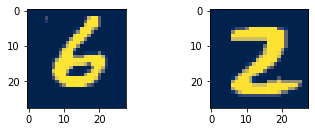

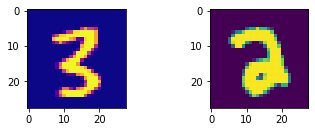

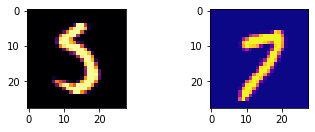

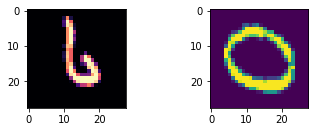

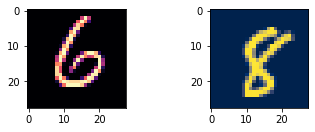

In [19]:
# plotting a couple of numbers randomly
for i in range(5):
    plt.subplot(221)
    plt.imshow(choice(x_train),cmap=plt.get_cmap(choice(plot_gradients)))
    plt.subplot(222)
    plt.imshow(choice(x_train),cmap=plt.get_cmap(choice(plot_gradients)))
    plt.show()

In [17]:
# mormalizing the model
x_train, x_test = x_train/255.0, x_test/255.0

In [18]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [8]:
inputs = keras.layers.Input(shape=(28, 28))
Neural_network = keras.layers.SimpleRNN(64)(inputs)
outputs = keras.layers.Dense(10, activation="softmax")(Neural_network)

<h1 Style="color:purple;">Model</h1>

In [9]:
model = tf.keras.models.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                5952      
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

In [11]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5705 - accuracy: 0.8204
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2818 - accuracy: 0.9184
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2290 - accuracy: 0.9339
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1990 - accuracy: 0.9431
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1825 - accuracy: 0.9479


In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1569 - accuracy: 0.9565


[0.15694934129714966, 0.9564999938011169]

<h1 Style="color:purple;">Graphs</h1>

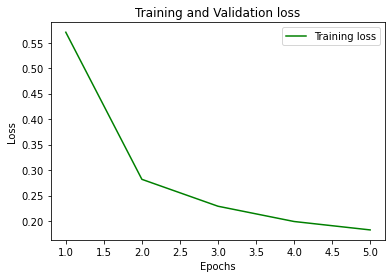

In [13]:
loss_train = history.history['loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

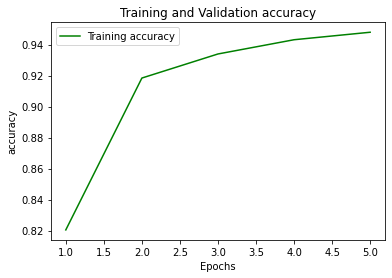

In [14]:
loss_train = history.history['accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()